In [125]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd
from skimage import data
from matplotlib import image as im

In [126]:
def saturation(image):
    #trans into grayscale
    rgb_weights = [0.2989, 0.5870, 0.1140]
    image = np.dot(image[...,:3], rgb_weights)
    
    #remaining histogram : median - gray_range*var <= grayscale <= median + gray_range*var
    gray_range = 0.2; 
    df = pd.DataFrame(image.flatten(), columns=['grayscale'])
    thresholds[0] = df['grayscale'].median() - gray_range*np.sqrt(df['grayscale'].var()); 
    thresholds[1] = df['grayscale'].median() + gray_range*np.sqrt(df['grayscale'].var());
    # print(df['grayscale'].median())
    # print(np.sqrt(df['grayscale'].var()))
    # print(thresholds)
    
    # Using the threshold values, we generate the three regions.
    saturated_image = image
    saturated_image = np.where(image > thresholds[0], image, 0)
    saturated_image = np.where(image <= thresholds[1], image, 255)
    
    # normalization
    # saturated_image = np.dot(saturated_image[...], 255/(thresholds[1]-thresholds[0]))
    
    return saturated_image

0
1


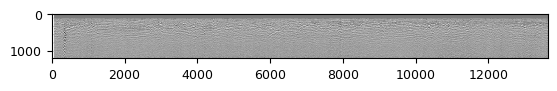

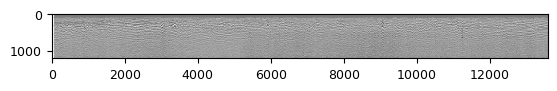

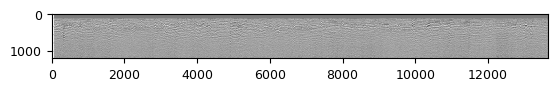

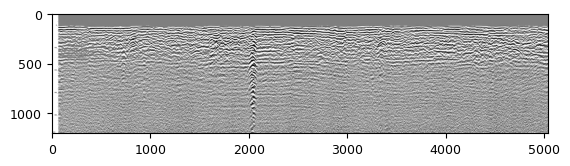

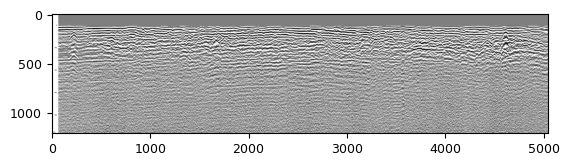

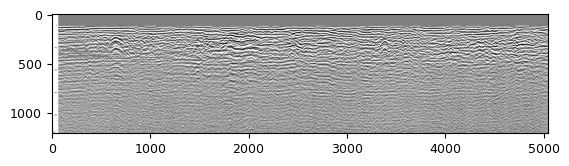

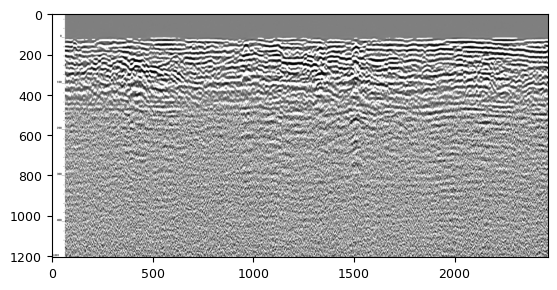

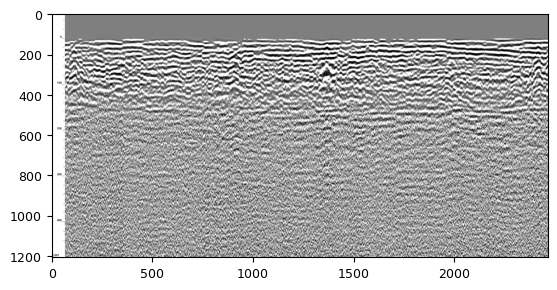

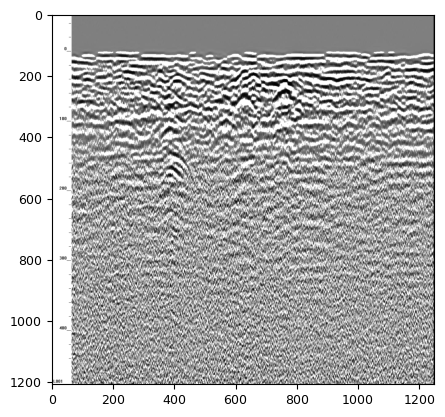

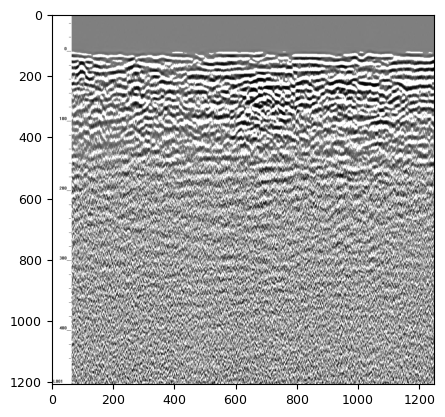

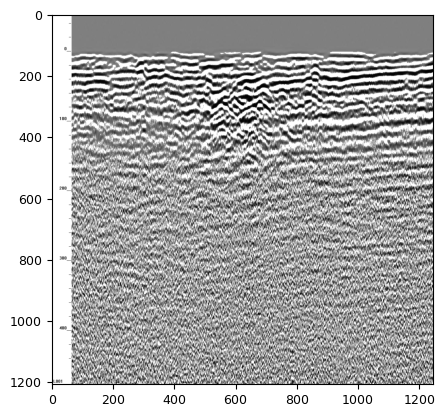

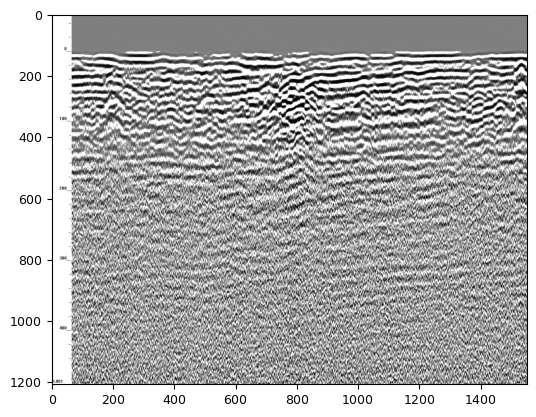

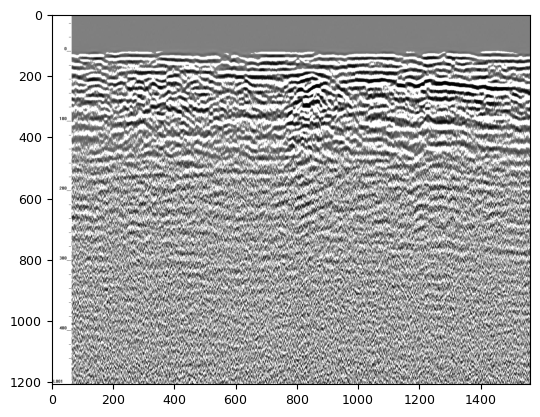

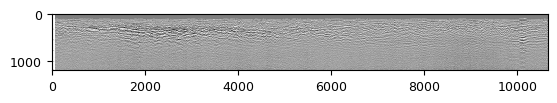

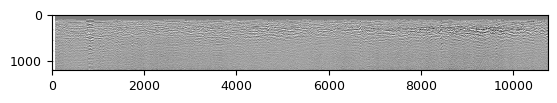

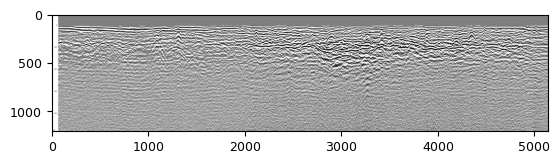

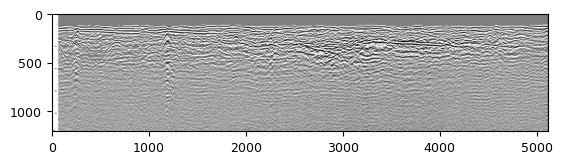

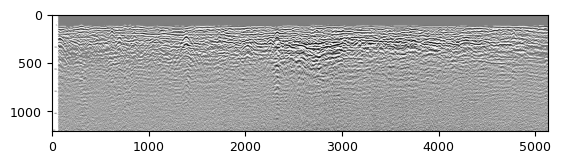

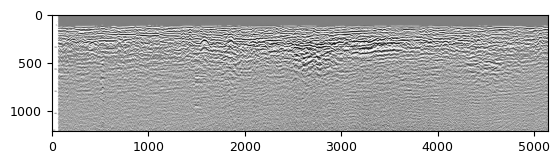

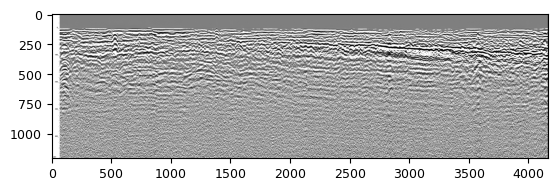

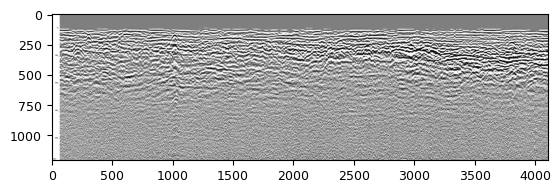

In [132]:
# Check if 'processed' directory is existed
if not os.path.isdir('JPL_20230124/processed'):
    os.mkdir('JPL_20230124/processed')

for i in range(23):
    file = 'JPL_20230124/UW/WLT_350_210926 P_2111131 WLT_350_210926__' + str(i).zfill(3) + ' P_2111131.JPG'
    if not os.path.isfile(file):
        print(i)
        continue
    # The input image.
    image = im.imread(file)
    processed_image = saturation(image)
    plt.imshow(processed_image, cmap='gray')
    plt.imsave('JPL_20230124/processed/WLT_350_210926 P_2111131 WLT_350_210926__' + str(i).zfill(3) + ' P_2111131_processed.JPG', processed_image, cmap='gray')
    plt.show()